In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RationalQuadratic as RQ
from scipy.stats import gamma, norm
import numpy as np
from matplotlib import pyplot

In [2]:
def objective(x, noise=0.1):
    noise = np.random.normal(loc=0, scale=noise)
    return -np.sin(6*x) - x**1.5 + 0.2*x + noise

def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = np.asarray(np.arange(0, 2, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = model.predict(Xsamples, return_std=True)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()

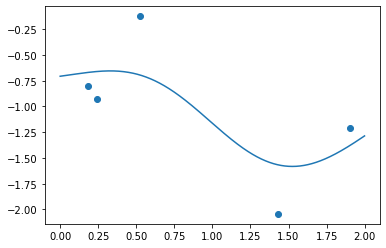

In [3]:
iterations = 100
xSample = np.random.random_sample(5) * 2
xSample = xSample.reshape(len(xSample), 1)
ySample = objective(xSample)
kern = RQ(length_scale=1)
gp = GPR(kernel=kern, alpha=0.1, optimizer=None)
gp.fit(xSample, ySample)
plot(xSample, ySample, gp)

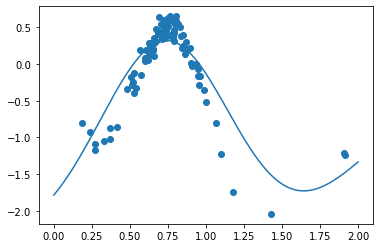

In [4]:
for _ in range(iterations):
    #Select potential next point
    xPotential = np.random.random_sample(10) * 2
    xPotential = xPotential.reshape(len(xPotential), 1)
    #Acquisition Func for Probability of Improvement
    mean, sigma = gp.predict(xSample, return_std=True)
    meanPotential, sigmaPotential = gp.predict(xPotential, return_std=True)
    currentBest = np.max(mean)
    probs = norm.cdf((meanPotential[:, 0] - currentBest) / (sigmaPotential+1E-9))
    bestPointIndex = np.argmax(probs)
    bestPoint = xPotential[bestPointIndex, 0]
    yActual = objective(bestPoint)
    xSample = np.vstack((xSample, [[bestPoint]]))
    ySample = np.vstack((ySample, [[yActual]]))
    gp.fit(xSample, ySample)
plot(xSample, ySample, gp)

# Reflection

While I felt this question was very good, I think it needed some more direction. I may have been going a bit slow, but a lot of my time after getting the code into a jupyter notebook was spent trying to find where everything was in the book. With a bit of work though, this question could be very helpful